In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving news_comments_12000.xlsx to news_comments_12000 (1).xlsx


In [ ]:
df = pd.read_excel("news_comments_12000.xlsx")

# Display the first few rows of the DataFrame
print(df)

       Unnamed: 0                                            Comment  \
0               0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।   
1               1  এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...   
2               2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...   
3               3                                    চুরি নয় লুটপাট।   
4               4  ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...   
...           ...                                                ...   
13797       13797                              ভালভাবে নির্বাচন দেন।   
13798       13798  বঙ্গবন্ধুর খুনীদের পারবেন না? এই মূহূর্তে অবশ্...   
13799       13799             আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক।   
13800       13800  দেশের প্রশাসন নিরপেক্ষ না। এমতাবস্থায় তারেক জি...   
13801       13801  সেই ২১ আগস্টের কারিগর বিএনপির রা আজ আমাদের গনত...   

                 Tag  
0           Negative  
1           Negative  
2      Very Negative  
3      Very Negative  
4            Neutral

In [ ]:
X = df['Comment'].values
y = df['Tag'].values

In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq)


AttributeError: ignored

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [ ]:
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {class_label: total_samples / (len(class_counts) * class_count) for class_label, class_count in enumerate(class_counts)}

In [ ]:
# Creating the CNN model with dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_pad.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))  # Additional dense layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
621/621 [==============================] - 53s 86ms/step - loss: -4754905088.0000 - accuracy: 0.2137 - val_loss: -15142804480.0000 - val_accuracy: 0.2009
Epoch 2/10
621/621 [==============================] - 54s 87ms/step - loss: -46949638144.0000 - accuracy: 0.2137 - val_loss: -102941310976.0000 - val_accuracy: 0.2009
Epoch 3/10
422/621 [===================>..........] - ETA: 17s - loss: -166733529088.0000 - accuracy: 0.2125

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

35/35 [==============================] - 0s 5ms/step
Precision: 0.8174
Recall: 0.7944
Confusion Matrix:
[[518  88]
 [102 394]]
35/35 [==============================] - 0s 6ms/step - loss: 0.7446 - accuracy: 0.8276
Test Loss: 0.7446456551551819, Test Accuracy: 0.8275862336158752


In [ ]:
# Example new text data
new_text = ["এটি একটি অসাধারণ বই।",
    "বইটি খুব আকর্ষণীয়!",
    "এই চলচ্চিত্রটি আমার মনটি ছুঁয়ে গেলো।",
    "খুব ভালোই আছি।",
    "আমি এই প্রোডাক্টের সাথে খুব নিরাপদ এবং সন্তুষ্ট।",
    "এটি ভীতিকর ছিল, আমি আর দেখতে পারতেছি না।",
    "কিছুটা অসন্তুষ্ট আছি এই প্রোডাক্টের সাথে।",
    "এই বইটি আমার কাছে একটি নামী ছিল, তাই আমি পুরোটা পড়তে পারতাম না।",
    "এই চিত্রগ্রহণ অসাধারণ ছিল, খুব ভালো প্রদর্শনী।",
    "ব্র্যান্ডটি সারাটা দুনিয়ায় প্রসিদ্ধ, কিন্তু আমি এটি ব্যবহার করতে পারছি না।"
    "এটি অত্যন্ত বিরক্তিকর।",
    "চলচ্চিত্রটি খুব ঘৃণাসহকারী ছিল।",
    "এই প্রোডাক্টটি আমার কাছে একটি বিপর্যস্ত অভিজ্ঞান ছিল।",
    "বইটি আমার প্রতি প্রচারিত চিন্তা গুলির বিরুদ্ধে ছিল।",
    "এই চলচ্চিত্রটি খুব উপহাসপ্রদ ছিল, এটি যে কোনও ধরনের সাহায্য ছাড়া থাকতে পারত।",
    "আমি এই প্রোডাক্ট দ্বারা খুব প্রসন্ন নই।",
    "এই বইটি আমার পক্ষ থেকে একটি মৌন বুঝতে হয়।",
    "এই চিত্রগ্রহণ অত্যন্ত নিরুত্সাহিত করতে পারতেছিলাম না।",
    "এই ব্র্যান্ড পণ্যটি দ্রুত ধ্বংস হয়ে গিয়েছে।",
    "আমি এই প্রোডাক্টে অত্যন্ত প্রতিস্থাপন অনুভব করতেছি।"]

# Tokenize and pad the new text data
new_text_seq = tokenizer.texts_to_sequences(new_text)
new_text_pad = pad_sequences(new_text_seq, maxlen=X_pad.shape[1])

# Make predictions on the new text data
new_predictions = model.predict(new_text_pad)

# Convert predicted probabilities to binary predictions
new_predictions_binary = (new_predictions > 0.5).astype(int)

# Decode binary predictions back to labels
new_pred_labels = label_encoder.inverse_transform(new_predictions_binary.flatten())

# Display the predictions
for text, label in zip(new_text, new_pred_labels):
    print(f'Text: {text}, Predicted Label: {label}')

1/1 [==============================] - 0s 18ms/step
Text: এটি একটি অসাধারণ বই।, Predicted Label: Positive
Text: বইটি খুব আকর্ষণীয়!, Predicted Label: Positive
Text: এই চলচ্চিত্রটি আমার মনটি ছুঁয়ে গেলো।, Predicted Label: Positive
Text: খুব ভালোই আছি।, Predicted Label: Positive
Text: আমি এই প্রোডাক্টের সাথে খুব নিরাপদ এবং সন্তুষ্ট।, Predicted Label: Positive
Text: এটি ভীতিকর ছিল, আমি আর দেখতে পারতেছি না।, Predicted Label: Negative
Text: কিছুটা অসন্তুষ্ট আছি এই প্রোডাক্টের সাথে।, Predicted Label: Positive
Text: এই বইটি আমার কাছে একটি নামী ছিল, তাই আমি পুরোটা পড়তে পারতাম না।, Predicted Label: Positive
Text: এই চিত্রগ্রহণ অসাধারণ ছিল, খুব ভালো প্রদর্শনী।, Predicted Label: Positive
Text: ব্র্যান্ডটি সারাটা দুনিয়ায় প্রসিদ্ধ, কিন্তু আমি এটি ব্যবহার করতে পারছি না।এটি অত্যন্ত বিরক্তিকর।, Predicted Label: Positive
Text: চলচ্চিত্রটি খুব ঘৃণাসহকারী ছিল।, Predicted Label: Positive
Text: এই প্রোডাক্টটি আমার কাছে একটি বিপর্যস্ত অভিজ্ঞান ছিল।, Predicted Label: Positive
Text: বইটি আমার প্রতি প্রচারি

Type counts:
Negative    3107
Positive    2403
Name: class_label, dtype: int64


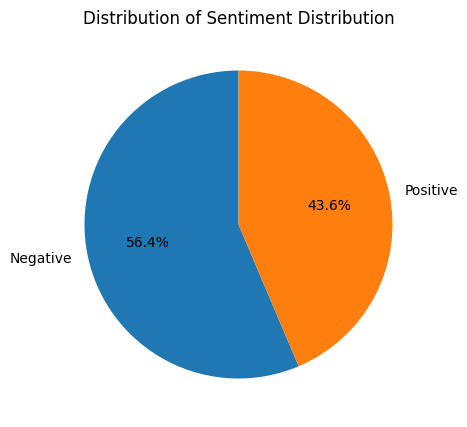

In [ ]:
import matplotlib.pyplot as plt
column_name = 'class_label'

# Count the frequency of each type
type_counts = df[column_name].value_counts()

# Print the results
print("Type counts:")
print(type_counts)

plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%0.1f%%', startangle=90)
plt.title('Distribution of Sentiment Distribution')
plt.show()